In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ego import Ego
from lidar import Lidar
from target import Target
from pointcloud import PC


df = pd.read_excel('lidar2.xlsx')

df.columns = ['channel', 'azimuth_offset', 'elevation_angle']

l1=Lidar("LR",(1.81, 1.841, 0), df['elevation_angle'].to_numpy(), df['azimuth_offset'].to_numpy(),(0.1,0.2,0.3), 0.4, 180, 180)

e1=Ego(0, 0, 0, (3,1.8,2))

In [2]:
data_distance = []

object_size_dict = {
    "Pedestrian": (100/1000, 440/1000),
    "Motorcycle": (660/1000, 660/1000),
    "Car": (1535/1000, 1282/1000),
    "Truck": (1560/1000, 1607/1000)
}
data_area = []

for obj in object_size_dict:
    for i in range(200):
        
#         t1 = Target((distance+ mountig_position_x ,0, 0), (4, target_y_slider, target_z_slider))
        t1= Target((i+1.81,0, 0), (4, object_size_dict[obj][0], object_size_dict[obj][1]))
        pc1 = PC(t1,e1,l1)

#         t2 = Target((20+1,-0.5), (4, 0.25+i/8, 0.25+i/8))
#         pc2 = PC(t2,e1,l1)
#         print(obj, object_size_dict[obj][0], object_size_dict[obj][1])
        data_distance.append([obj, i, pc1.get_filtered_points(object_size_dict[obj][0], object_size_dict[obj][1], 0).shape[0]])
#         data_area.append([obj, 0.25+i/8 * 0.25+i/8, pc2.get_filtered_points(0.25+i/8, 0.25+i/8).shape[0]])


In [3]:
%matplotlib widget

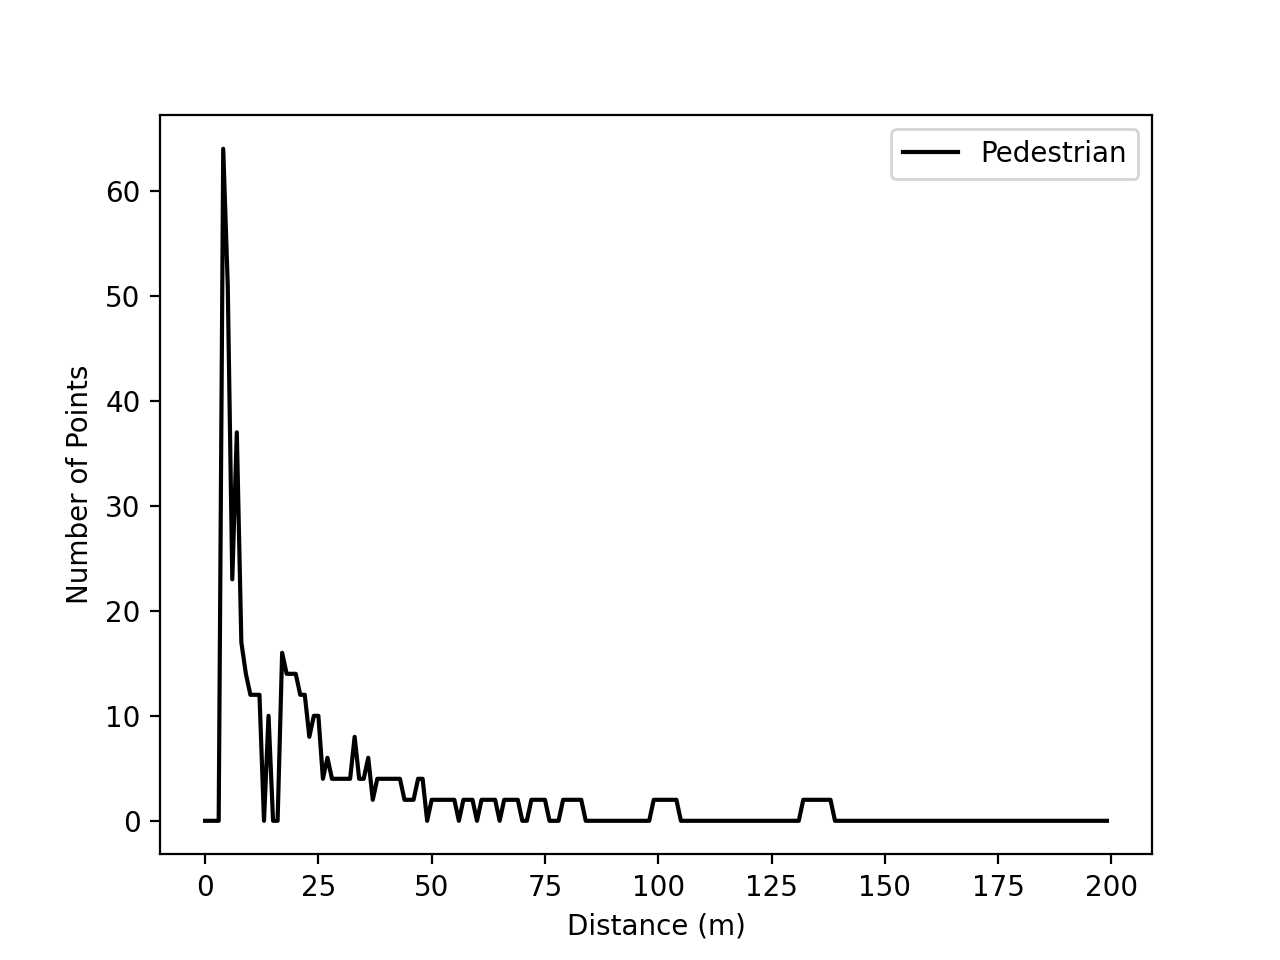

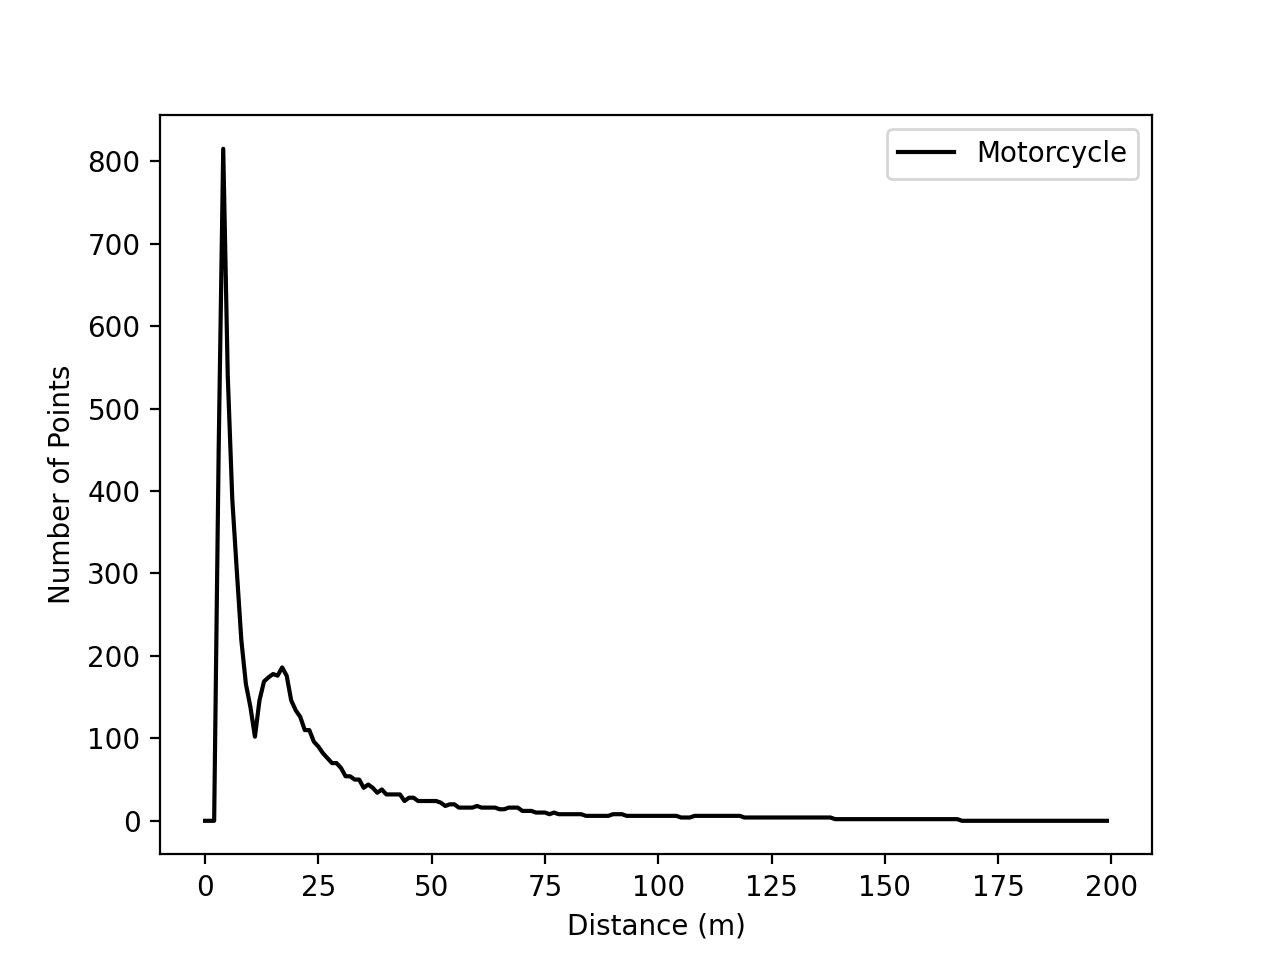

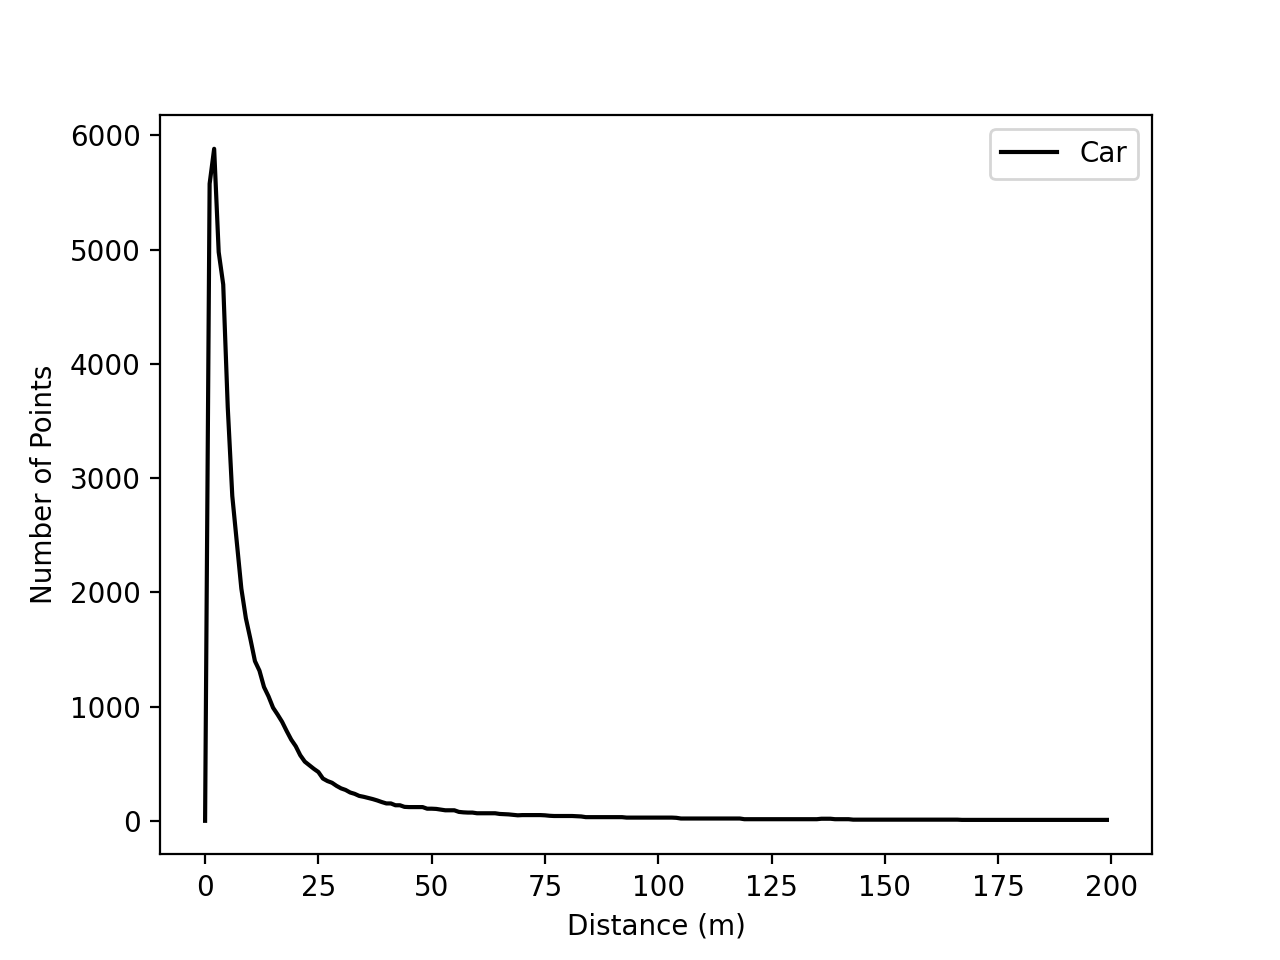

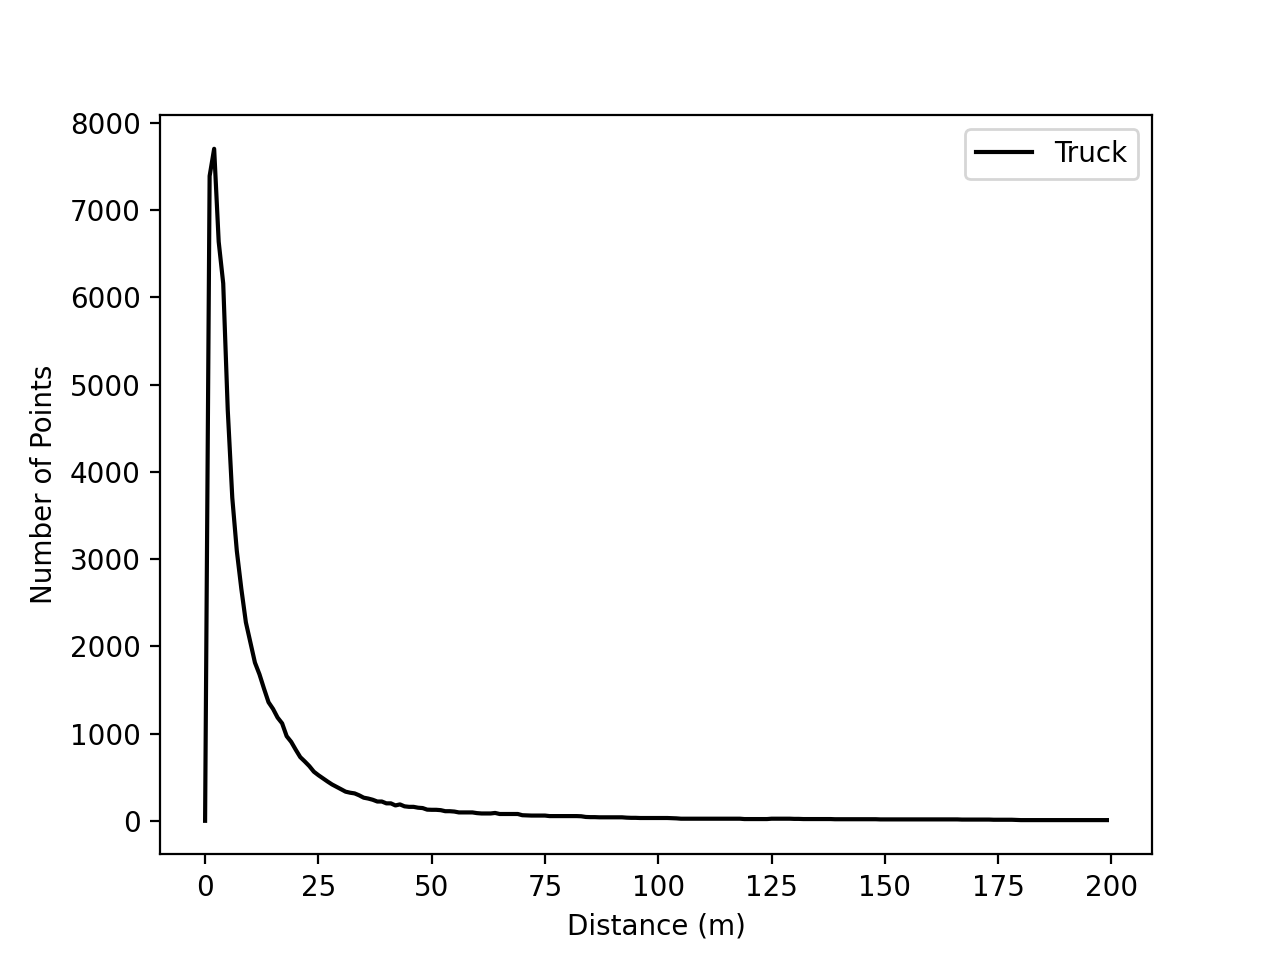

In [4]:
import matplotlib.pyplot as plt


for i in range(4):
    Distance= [i[1] for i in data_distance[200 * i:200 * (i+1)]]
    number_of_ponts1= [i[2] for i in data_distance[200 * i:200 * (i+1)]]

#     Area=[i[1] for i in data_area]
#     number_of_ponts2=[i[2] for i in data_area]

    fig=plt.figure(dpi=200)
    ax=fig.add_subplot(111, label="1")
#     ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(Distance, number_of_ponts1, color='k')
    ax.set_xlabel("Distance (m)", color="k")
    ax.set_ylabel("Number of Points", color="k")
    ax.tick_params(axis='x', colors="k")
    ax.tick_params(axis='y', colors="k")


#     ax2.plot(Area, number_of_ponts2, color="C1")
#     ax2.xaxis.tick_top()
#     ax2.yaxis.tick_right()
#     ax2.set_xlabel('Area (m^2)', color="C1")       
#     ax2.xaxis.set_label_position('top') 
#     ax2.yaxis.set_label_position('right') 
#     ax2.tick_params(axis='x', colors="C1")
#     ax2.tick_params(axis='y', colors="C1")

    ax.legend([data_distance[200 * i:200 * (i+1)][0][0]], loc='upper right')
#     ax2.legend(['at distance = 20 (m)'], loc='upper right')

    plt.show()

In [5]:
distance_data_area = [] 

object_size_dict = {
    "Pedestrian": (100/1000, 440/1000),
    "Motorcycle": (660/1000, 660/1000),
    "Car": (1535/1000, 1282/1000),
    "Truck": (1560/1000, 1607/1000)
}

for obj in object_size_dict:
    data_area = []
    for i in range(45):
        t1= Target((i+1.81,0, 0), (4, object_size_dict[obj][0], object_size_dict[obj][1]))
        pc1 = PC(t1,e1,l1)
        data_area.append([i, obj, pc1.get_filtered_points(object_size_dict[obj][0], object_size_dict[obj][1], 0).shape[0]])
    distance_data_area.append(data_area)

data = pd.DataFrame(distance_data_area)
data_rows = []
for index, row in data.iterrows():
    for i in range(43):
        data_rows.append(row[i][:])
data_rows = pd.DataFrame(data_rows)
data_rows.columns = ['distance', 'target type', 'Number of Points']
# data_rows['target type'] = data_rows['target type'].apply(lambda x: str(x) + ' (m^2)')

<ipython-input-6-21682d115aac>:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

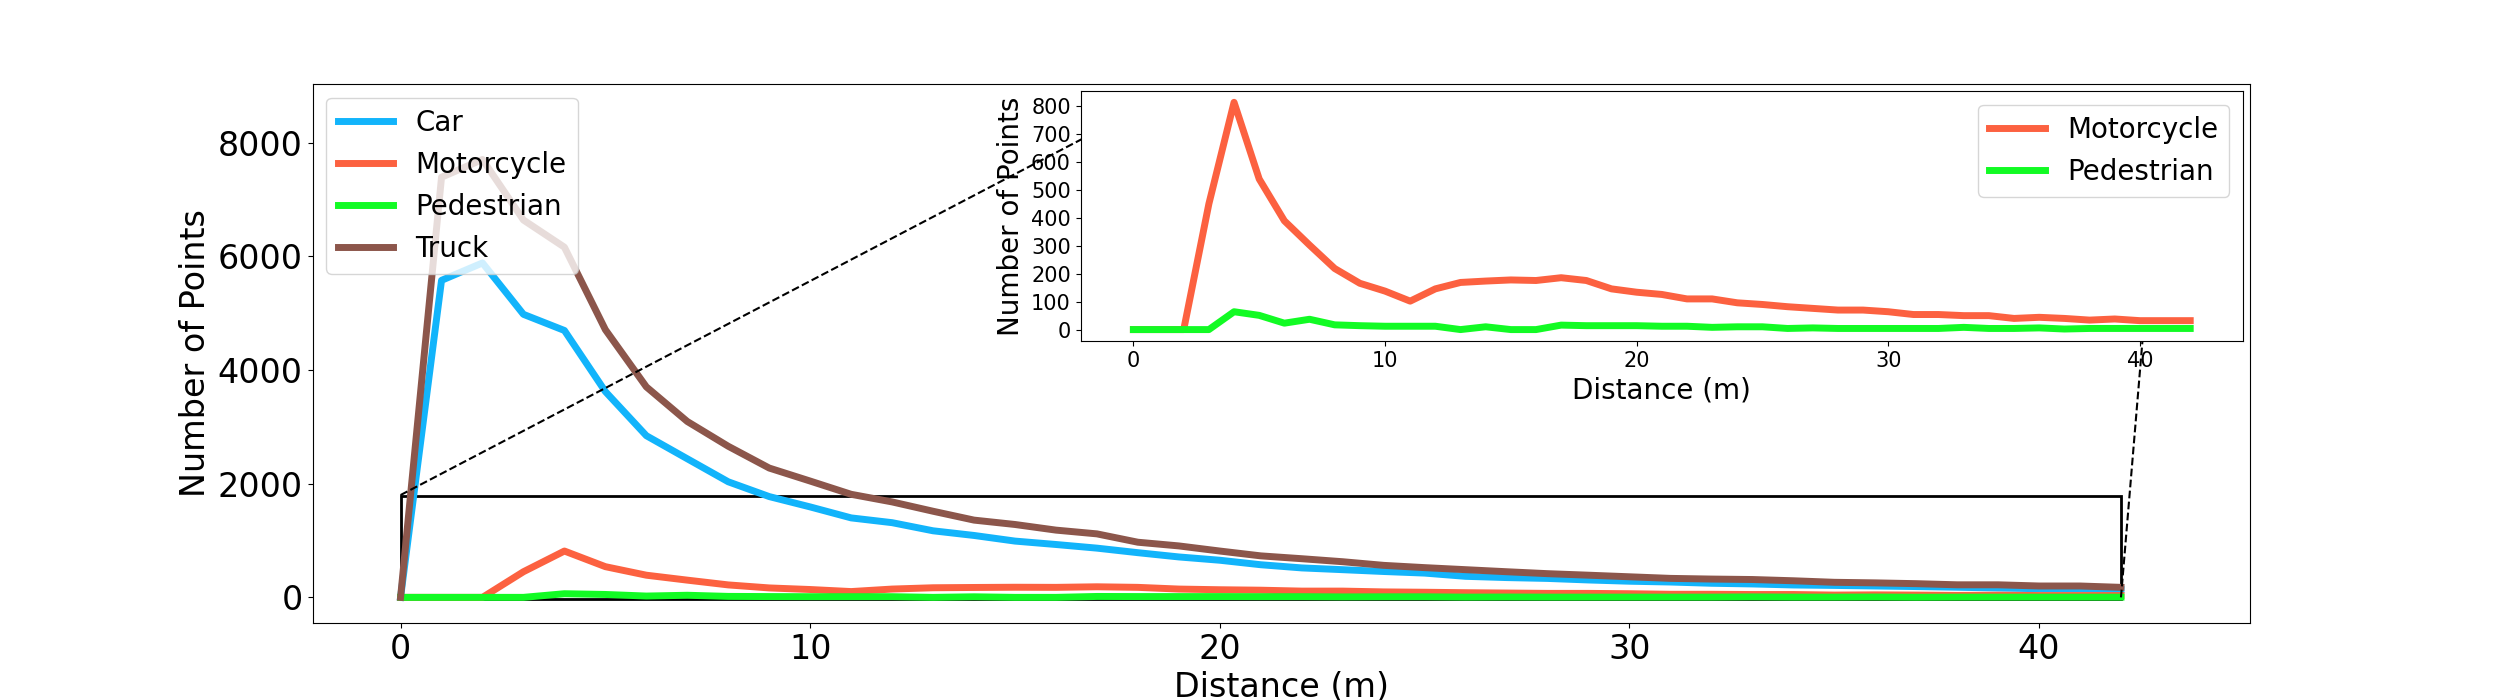

In [6]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


fig = plt.figure(facecolor='white', figsize=(25,7))
ax = fig.add_subplot(111)
# fig, ax = plt.subplots(figsize=(8,6))

colors = ['#12B4FB', '#FC6140', '#12FB24', 'tab:brown']
for label, df in data_rows.groupby('target type'):
#     print(df.columns)
#     df = df[['distance', 'Number of Points']]
    ax.plot(df['distance'], df['Number of Points'], linewidth=5, label=label, color=colors.pop(0))
leg = plt.legend(loc='upper left', prop={'size': 20})
# leg = plt.legend()
# get the individual lines inside legend and set line width
# for line in leg.get_lines():
#     line.set_linewidth(10)
# ax.line

# fig.suptitle('test title', fontsize=20)
plt.xlabel('Distance (m)', fontsize=24)
plt.ylabel('Number of Points', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.plot([0,17], [1800, 8200], color='k', linestyle='--')
ax.plot([42,43], [0, 8600], color='k', linestyle='--')


rect = patches.Rectangle((0, -20), 42, 1800, linewidth=2, edgecolor='k', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# # this is an inset axes over the main axes
inset_axes = inset_axes(ax, 
                    width="60%", # width = 30% of parent_bbox
                    height=2.5, # height : 1 inch
                    loc=1)

# ax.inset_axes((0.5,1-0.3,.3,.3))

#plt.title('Probability')
data_rows2 = data_rows[data_rows['target type'].isin(['Pedestrian', 'Motorcycle'])]
colors = ['#FC6140', '#12FB24']
for label, df in data_rows2.groupby('target type'):
#     print(df.columns)
#     df = df[['distance', 'Number of Points']]
    inset_axes.plot(df['distance'], df['Number of Points'], linewidth=5, label=label, color=colors.pop(0))
leg = plt.legend(loc='upper right', prop={'size': 20})

    
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Number of Points', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)